<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [162]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

In [163]:
#Explore the data
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [164]:
#Check for missing values
netflix_df.isna().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
duration        False
description     False
genre           False
dtype: bool

In [165]:
netflix_df_90s_movies = netflix_df[(netflix_df['type'] == 'Movie') & (netflix_df['release_year'] >= 1990) & (netflix_df['release_year'] < 2000)]
netflix_df_90s_movies

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
6,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
118,s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"Debra Winger, Barbara Hershey, Gabriel Byrne, ...",United States,"April 1, 2018",1993,101,At the center of this engrossing melodrama is ...,Dramas
145,s211,Movie,A Night at the Roxbury,John Fortenberry,"Will Ferrell, Chris Kattan, Dan Hedaya, Molly ...",United States,"December 1, 2019",1998,82,"After a run-in with Richard Grieco, dimwits Do...",Comedies
167,s239,Movie,A Thin Line Between Love & Hate,Martin Lawrence,"Martin Lawrence, Lynn Whitfield, Regina King, ...",United States,"December 1, 2020",1996,108,When a philandering club promoter sets out to ...,Comedies
194,s274,Movie,Aashik Awara,Umesh Mehra,"Saif Ali Khan, Mamta Kulkarni, Mohnish Bahl, S...",India,"June 1, 2017",1993,154,"Raised by a kindly thief, orphaned Jimmy goes ...",Dramas
...,...,...,...,...,...,...,...,...,...,...,...
4672,s7536,Movie,West Beirut,Ziad Doueiri,"Rami Doueiri, Mohamad Chamas, Rola Al Amin, Ca...",France,"October 19, 2020",1999,106,Three intrepid teens roam the streets of Beiru...,Dramas
4689,s7571,Movie,What's Eating Gilbert Grape,Lasse Hallström,"Johnny Depp, Leonardo DiCaprio, Juliette Lewis...",United States,"January 1, 2021",1993,118,"In a backwater Iowa town, young Gilbert is tor...",Classic Movies
4718,s7624,Movie,Wild Wild West,Barry Sonnenfeld,"Will Smith, Kevin Kline, Kenneth Branagh, Salm...",United States,"January 1, 2020",1999,106,"Armed with an ingenious arsenal, two top-notch...",Action
4746,s7682,Movie,Wyatt Earp,Lawrence Kasdan,"Kevin Costner, Dennis Quaid, Gene Hackman, Dav...",United States,"January 1, 2020",1994,191,Legendary lawman Wyatt Earp is continually at ...,Action


Text(0, 0.5, 'Number of Movies')

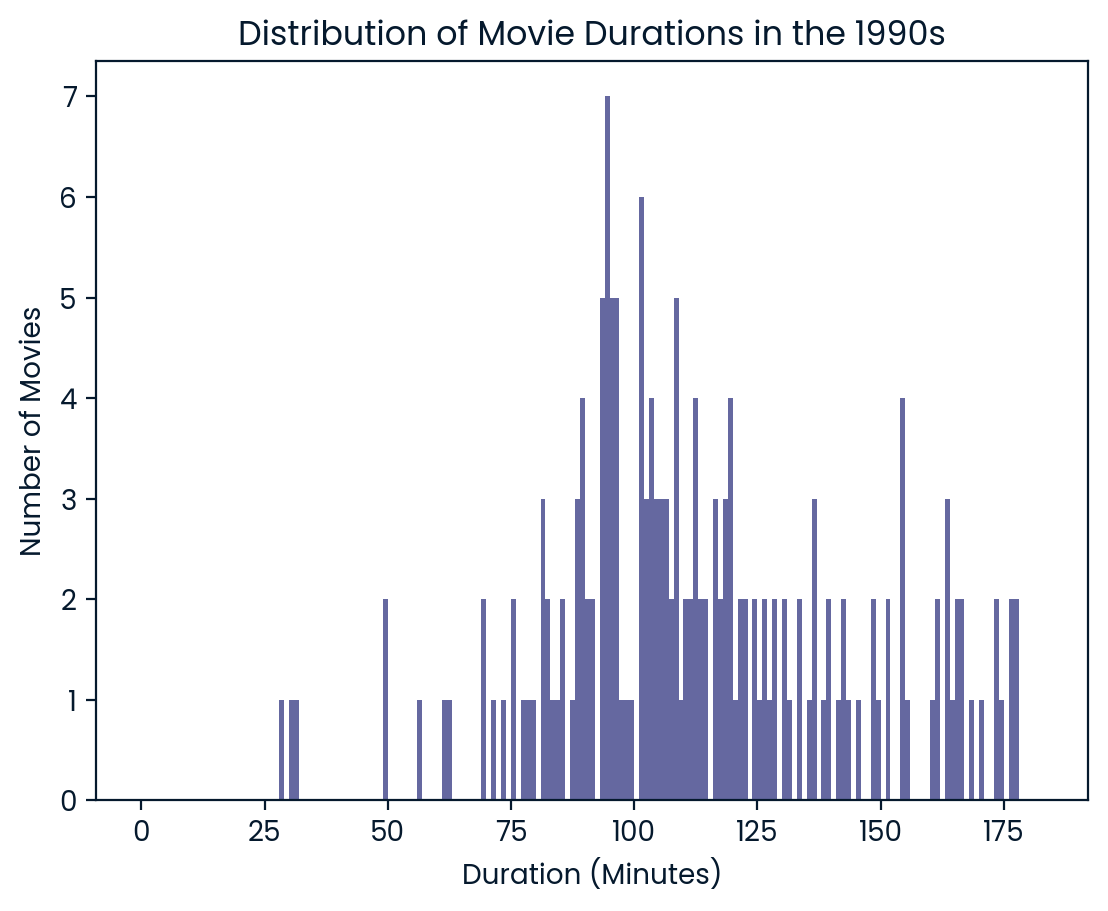

In [166]:
#Most Frequent Movie DURATION in the 1990s.
#Range is used 
    #If your data has a wide or irregular distribution
    #Automatic binning algorithms create more precise (float) boundaries

counts, bins, patches = plt.hist(netflix_df_90s_movies['duration'], bins = range(len(netflix_df_90s_movies)+1))
plt.title('Distribution of Movie Durations in the 1990s')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Number of Movies')


In [167]:
#Using histogram bins
max_count_index = counts.argmax()
#bins[max_count_index]
max_count_index


94

In [168]:
#Using Mode
duration = netflix_df_90s_movies['duration'].mode().values[0]
print(duration)

94


In [169]:
#All the records with 94 minutes duration
netflix_df_90s_movies[netflix_df_90s_movies['duration'] == 94]

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
675,s1003,Movie,Blue Streak,Les Mayfield,"Martin Lawrence, Luke Wilson, Peter Greene, Da...",Germany,"January 1, 2021",1999,94,A jewel thief returns to his hiding place afte...,Action
1775,s2842,Movie,How to Be a Player,Lionel C. Martin,"Bill Bellamy, Natalie Desselle, Lark Voorhies,...",United States,"November 1, 2019",1997,94,Dray lives life one woman at a time and is the...,Comedies
1852,s2963,Movie,In Defense of a Married Man,Joel Oliansky,"Judith Light, Michael Ontkean, Jerry Orbach, P...",United States,"October 1, 2011",1990,94,A lawyer's husband is having an affair. When h...,Dramas
2943,s4702,Movie,Out of Life,Maroun Baghdadi,"Hippolyte Girardot, Rafik Ali Ahmad, Hussein S...",France,"October 19, 2020",1991,94,"Kidnapped by guerrillas in Beirut, a French ph...",Classic Movies
3563,s5698,Movie,Solo Con Tu Pareja,Alfonso Cuarón,"Luis de Icaza, Dobrina Liubomirova, Isabel Ben...",Mexico,"September 1, 2018",1991,94,A yuppie playboy looks for a quick death after...,Comedies
4322,s6945,Movie,The Trigger Effect,David Koepp,"Kyle MacLachlan, Elisabeth Shue, Dermot Mulron...",United States,"January 1, 2018",1996,94,When a power failure throws their suburban tow...,Thrillers
4471,s7183,Movie,Trainspotting,Danny Boyle,"Ewan McGregor, Ewen Bremner, Jonny Lee Miller,...",United Kingdom,"October 1, 2019",1996,94,Renton and his mates cope with the gritty real...,Comedies


In [170]:
#movies with duration less than 90 minutes
short_action_movies = netflix_df_90s_movies[(netflix_df_90s_movies['duration'] < 90) & (netflix_df_90s_movies['genre'] == 'Action')]
short_action_movies

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1288,s2039,Movie,EVANGELION: DEATH (TRUE)²,Hideaki Anno,"Megumi Ogata, Kotono Mitsuishi, Megumi Hayashi...",Japan,"June 21, 2019",1998,69,"Fifteen years after the Second Impact, apathet...",Action
1698,s2708,Movie,Hero,Corey Yuen,"Takeshi Kaneshiro, Yuen Biao, Valerie Chow, Je...",Hong Kong,"August 1, 2018",1997,89,A pugilist from Shantung struggles to rise to ...,Action
2328,s3718,Movie,"Look Out, Officer",Sze Yu Lau,"Stephen Chow, Bill Tung, Stanley Sui-Fan Fung,...",Hong Kong,"August 16, 2018",1990,88,An officer killed on the job returns to Earth ...,Action
2993,s4787,Movie,Passenger 57,Kevin Hooks,"Wesley Snipes, Bruce Payne, Tom Sizemore, Alex...",United States,"January 1, 2021",1992,84,Air marshal John Cutter must stop notorious te...,Action
3297,s5299,Movie,Rumble in the Bronx,Stanley Tong,"Jackie Chan, Anita Mui, Françoise Yip, Bill Tu...",Hong Kong,"November 1, 2019",1995,89,During a visit to the Bronx to help out at his...,Action
3806,s6114,Movie,The Bare-Footed Kid,Johnnie To,"Aaron Kwok, Lung Ti, Maggie Cheung, Chien-lien...",Hong Kong,"August 16, 2018",1993,83,"While working at a family friend's business, a...",Action
3943,s6330,Movie,The End of Evangelion,"Hideaki Anno, Kazuya Tsurumaki","Megumi Ogata, Kotono Mitsuishi, Megumi Hayashi...",Japan,"June 21, 2019",1997,87,"Seele orders an all-out attack on NERV, aiming...",Action


In [171]:
#Counting Using loop
short_movie_count = 0

for lab, row in short_action_movies.iterrows():
    if row['duration'] < 90:
        short_movie_count += 1
short_movie_count

7

In [172]:
#Using len()
short_movie_count = len(short_action_movies)
short_movie_count

7

In [173]:
#Using sum
short_movie_count = (short_action_movies['duration'] < 90).sum()
short_movie_count

7

In [174]:
#count number of rows using .shape attribute
short_action_movies.shape[0]

7